In [10]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Download NLTK stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv('Shakespeare_data.csv')

# Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(line):
    words = line.split()
    return ' '.join([word for word in words if word.lower() not in stop_words])

df['PlayerLine'] = df['PlayerLine'].apply(remove_stopwords)

# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['PlayerLine'])

# Convert text into sequences of integers
sequences = tokenizer.texts_to_sequences(df['PlayerLine'])

# Prepare input-output pairs (overlapping sequences)
sequence_length = 5  # Number of input words
vocab_size = len(tokenizer.word_index) + 1  # Total number of unique words

input_sequences = []
output_words = []

for sequence in sequences:
    for i in range(sequence_length, len(sequence)):
        input_sequences.append(sequence[i-sequence_length:i])
        output_words.append(sequence[i])

# Convert lists to arrays
input_sequences = np.array(input_sequences)
output_words = np.array(output_words)

# One-hot encode the output words
output_words = np.eye(vocab_size)[output_words]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(input_sequences, output_words, test_size=0.2, random_state=42)
print("done")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


done


In [12]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 50, input_length=sequence_length))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Mustafa\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.0120 - loss: 8.7691 - val_accuracy: 0.0128 - val_loss: 7.9748
Epoch 2/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.0109 - loss: 7.4771 - val_accuracy: 0.0147 - val_loss: 8.0311
Epoch 3/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.0158 - loss: 7.2607 - val_accuracy: 0.0158 - val_loss: 8.1705
Epoch 4/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.0211 - loss: 7.0823 - val_accuracy: 0.0234 - val_loss: 8.2126
Epoch 5/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.0325 - loss: 6.8010 - val_accuracy: 0.0239 - val_loss: 8.3946
Epoch 6/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.0390 - loss: 6.5471 - val_accuracy: 0.0276 - val_loss: 8.6232
Epoch 7/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.0511 - loss: 6.2608 - val_accuracy: 0.0290 - val_loss: 8.7661
Epoch 8/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.0640 - loss: 5.9694 - 

In [14]:
from keras.layers import SimpleRNN

# Define the RNN model for comparison
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, 50, input_length=sequence_length))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
rnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Mustafa\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.0130 - loss: 8.6979 - val_accuracy: 0.0111 - val_loss: 7.9976
Epoch 2/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.0134 - loss: 7.4057 - val_accuracy: 0.0180 - val_loss: 8.1002
Epoch 3/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.0254 - loss: 6.9565 - val_accuracy: 0.0215 - val_loss: 8.2109
Epoch 4/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.0378 - loss: 6.4484 - val_accuracy: 0.0219 - val_loss: 8.4716
Epoch 5/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.0607 - loss: 5.9420 - val_accuracy: 0.0224 - val_loss: 8.6478
Epoch 6/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.1030 - loss: 5.4610 - val_accuracy: 0.0241 - val_loss: 8.8654
Epoch 7/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.1694 - loss: 4.9558 - val_accuracy: 0.0224 - val_loss: 9.1178
Epoch 8/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.2391 - loss: 4.4956 - 

LSTM Model: Loss = 15.3926, Accuracy = 0.0201
RNN Model: Loss = 15.7254, Accuracy = 0.0213


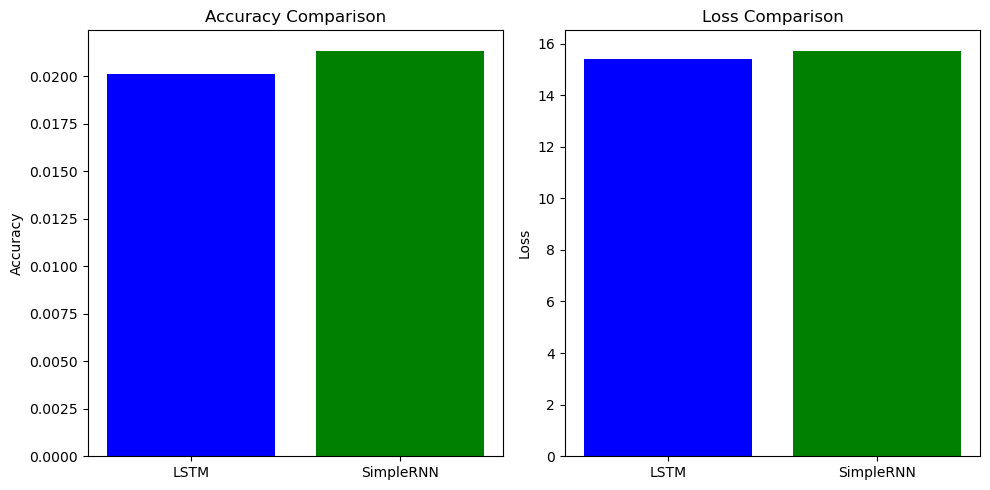

In [21]:
import matplotlib.pyplot as plt


# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)

# Evaluate RNN model (ensure rnn_model is already trained)
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)

# Print the comparison
print(f"LSTM Model: Loss = {lstm_loss:.4f}, Accuracy = {lstm_accuracy:.4f}")
print(f"RNN Model: Loss = {rnn_loss:.4f}, Accuracy = {rnn_accuracy:.4f}")

# Plot accuracy comparison
models = ['LSTM', 'SimpleRNN']
accuracy = [lstm_accuracy, rnn_accuracy]
loss = [lstm_loss, rnn_loss]

plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(models, accuracy, color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.bar(models, loss, color=['blue', 'green'])
plt.title('Loss Comparison')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_next_words(model, tokenizer, seed_text, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length)
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = tokenizer.index_word[predicted[0]]
        seed_text += " " + output_word
    return seed_text

# Example usage:
print(predict_next_words(lstm_model, tokenizer, "So shaken as we", 5))


In [28]:

print(predict_next_words(lstm_model, tokenizer, "So shaken as we", 5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
So shaken as we good think man friend upon


In [26]:
#saving model
import pickle
lstm_model.save('lstm_model.keras')

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved successfully.")

Model and tokenizer saved successfully.
